#Importing the Data and Performing Basic Exploration

**Business Problem**

The market research time wants to identify the target audience for each type of treadmill offered by company, to provide a better recommendation of the treadmills to new customer.

**Product Portfolio:**

- The KP281 is an entry-level treadmill that sells for 1500.
- The KP481 is for mid-level runners that sell for 1750.
- The KP781 treadmill has advanced features that sell for 2500.

In [1]:
!gdown 1GHmn-cN1gCDX2qdTHM2ETUX6Itak_CjI

Downloading...
From: https://drive.google.com/uc?id=1GHmn-cN1gCDX2qdTHM2ETUX6Itak_CjI
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 25.1MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.shape

(180, 9)

In [6]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


# Detecting Outliers

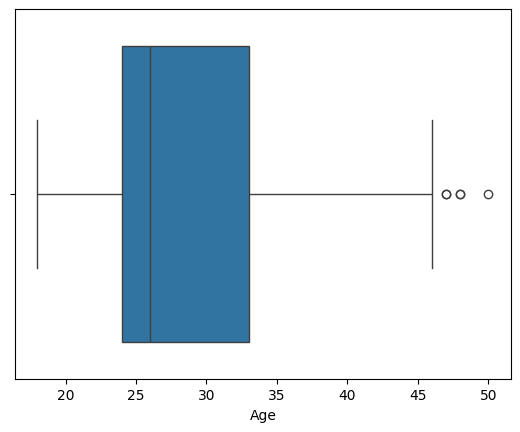

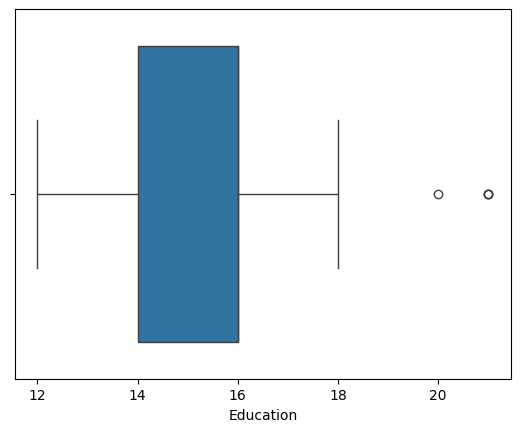

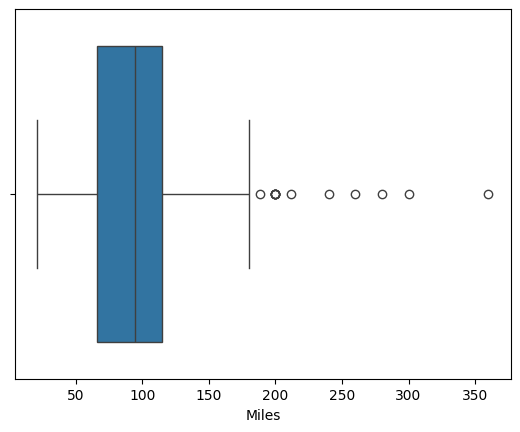

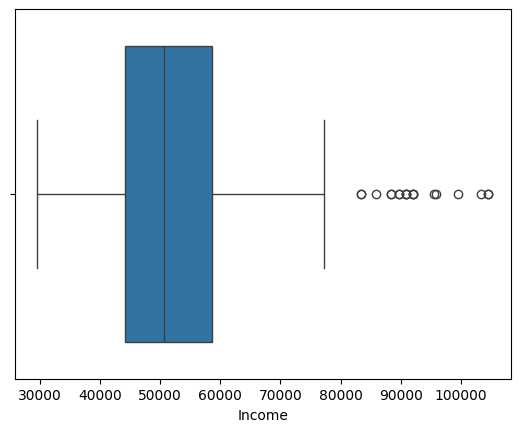

In [7]:
continuous_var = ['Age', 'Education', 'Miles', 'Income']

for var in continuous_var:
  sns.boxplot(data=df, x=var)
  plt.show()

We can see from the graphs that the outliers lie on the right (higher) end of the distribution. Therefore, we will clip only the values above the 95th percentile.

Before proceeding, let’s check whether the Education column contains discrete or continuous values.

In [8]:
df['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


Lets clip education as well.

In [9]:
df[['Age', 'Miles', 'Income', 'Education']].quantile(0.95)

,0.95
Age,43.05
Miles,200.00
Income,90948.25
Education,18.00


In [10]:
age_95 = df['Age'].quantile(0.95)
miles_95 = df['Miles'].quantile(0.95)
income_95 = df['Income'].quantile(0.95)
education_95 = df['Education'].quantile(0.95)

In [11]:
print(age_95, miles_95, income_95, education_95)

43.04999999999998 200.0 90948.24999999999 18.0


In [12]:
df['Age'] = np.clip(df['Age'], df['Age'].min(), age_95)
df['Miles'] = np.clip(df['Miles'], df['Miles'].min(), miles_95)
df['Income'] = np.clip(df['Income'], df['Income'].min(), income_95)
df['Education'] = np.clip(df['Education'], df['Education'].min(), education_95)

# Assessing How Demographic Factors Influence Purchase Behavior

In [13]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18.0,Male,14,Single,3,4,29562.0,112
1,KP281,19.0,Male,15,Single,2,3,31836.0,75
2,KP281,19.0,Female,14,Partnered,4,3,30699.0,66
3,KP281,19.0,Male,12,Single,3,3,32973.0,85
4,KP281,20.0,Male,13,Partnered,4,2,35247.0,47


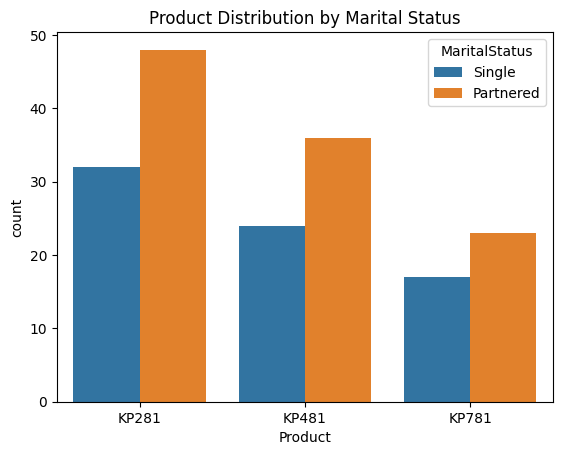

In [14]:
sns.countplot(data=df, x = 'Product', hue='MaritalStatus')
plt.title('Product Distribution by Marital Status')
plt.show()

Let's statistically test whether marital status is associated with the product category.

H0: There is no association between marital status and product category.

Ha: There is an association between marital status and product category.

In [15]:
product_maritalstatus_matrix = pd.crosstab(df['MaritalStatus'], df['Product']).values
product_maritalstatus_matrix

array([[48, 36, 23],
       [32, 24, 17]])

In [16]:
from scipy.stats import chi2_contingency

stats, pvalue, dof, exp_freq = chi2_contingency(product_maritalstatus_matrix)
stats, pvalue

(np.float64(0.0806554858532839), np.float64(0.9604745988058153))

In [17]:
if pvalue < 0.05:
  print('We reject the null hypothesis.')
else:
  print('We failed to reject the null hypothesis.')

We failed to reject the null hypothesis.


That means statistically null hypothesis is true, There is no association between Marital Status and Product.

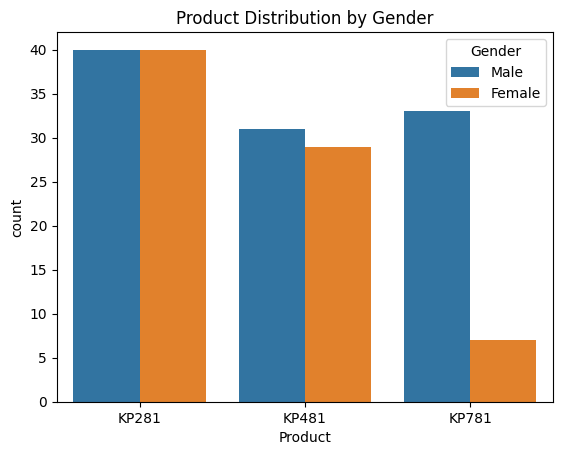

In [18]:
sns.countplot(data=df, x='Product', hue='Gender')
plt.title('Product Distribution by Gender')
plt.show()

It appears from the graph that the KP781 product is predominantly purchased by men, while KP281 and KP481 show a more gender-balanced purchase pattern.

Let's find that out with a statical test.

H0: There is no association between Gender and Product.

Ha: There is an association between Gender and Product.

In [19]:
stats, pvalue, dof, exp_freq = chi2_contingency(pd.crosstab(df['Product'], df['Gender'].values))
stats, pvalue

(np.float64(12.923836032388664), np.float64(0.0015617972833158714))

In [20]:
if pvalue < 0.05:
  print('We reject the null hypothesis.')
else:
  print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


In [21]:
confidence = 1-pvalue
confidence

np.float64(0.9984382027166842)

Statistical test confirms that the alternate hypothesis is true, i.e. There is an association between Gender and Product, and we can say it with 99.84% confidence.

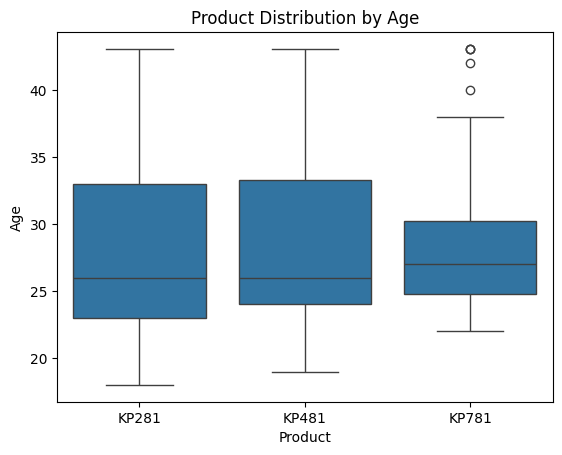

In [22]:
sns.boxplot(data=df, x='Product', y='Age')
plt.title('Product Distribution by Age')
plt.show()

From the above graph we can conclude that median age for the product KP781 is higher than the other 2 products.

Lets check, is there any association between Product and Age.

H0: There is no association between Product and Age.

Ha: There is an association between Product and Age.

In [23]:
age_281 = df[df['Product']=='KP281']['Age']
age_481 = df[df['Product']=='KP481']['Age']
age_781 = df[df['Product']=='KP781']['Age']

For one-way Anova let's check the assumptions.

Assumption 1: Data is normally distributed.

Test: Shapiro-Wilkin's test


H0: Data is normally distributed.

Ha: Data is not normally distributed.


Assumption 2: Data of different groups have homogeneous variability.

Test: Levene's test

In [24]:
from scipy.stats import shapiro

stats, pvalue = shapiro(age_281)
stats, pvalue

(np.float64(0.9227665229399747), np.float64(0.00012877046770166055))

In [25]:
if pvalue < 0.05:
  print('We reject the null hypothesis.')
else:
  print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


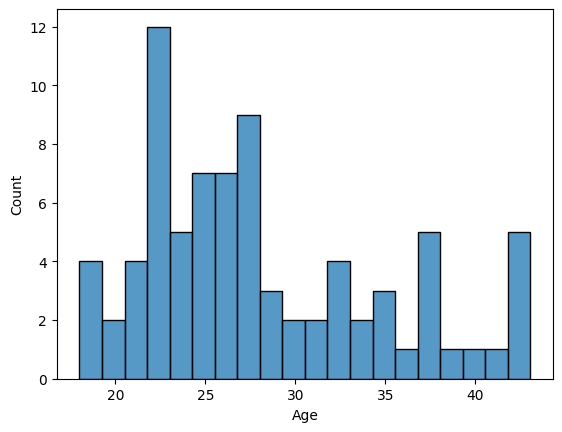

In [26]:
sns.histplot(age_281, bins=20)
plt.show()

Above shapiro test confirms that the data is not normal, therefore we will use kruskal wallis test instead of one-way anova.

Kruskal-Wallis Test:

H0: There is no association between Age and Product.

Ha: There is an association between Age and Product.

In [27]:
from scipy.stats import kruskal

stats, pvalue = kruskal(age_281, age_481, age_781)
stats, pvalue

(np.float64(0.37550632556845875), np.float64(0.8288192654252093))

In [28]:
if pvalue < 0.05:
  print('We reject the null hypothesis.')
else:
  print('We failed to reject the null hypothesis.')

We failed to reject the null hypothesis.


Null hypothesis is true statistically, therefore there is no association between age and product.

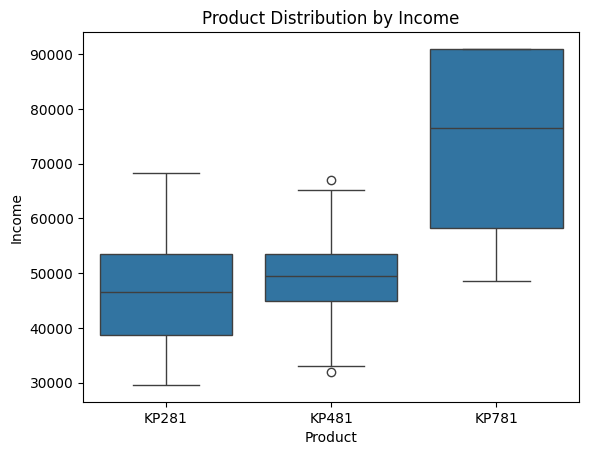

In [29]:
sns.boxplot(data=df, x='Product', y='Income')
plt.title('Product Distribution by Income')
plt.show()

From the above plot it seems people with more Income tend to purchase KP781. Let's analyse this hypothesis with statistical test.

Here also we will check the assumptions for one-way anova.

Assumption 1:
Data of different income groups are normally distributed.

H0: The data is normally distributed.

Ha: The data is not normally distributed.

In [30]:
income_281 = df[df['Product']=='KP281']['Income']
income_481 = df[df['Product']=='KP481']['Income']
income_781 = df[df['Product']=='KP781']['Income']

In [31]:
from scipy.stats import shapiro

stats, pvalue = shapiro(income_281)
stats, pvalue

(np.float64(0.9765696854079579), np.float64(0.14891520095086325))

In [32]:
if pvalue < 0.05:
  print('We reject the null hypothesis.')
else:
  print('We failed to reject the null hypothesis.')

We failed to reject the null hypothesis.


In [33]:
stats, pvalue = shapiro(income_481)
stats, pvalue

(np.float64(0.9748559350222983), np.float64(0.25032515246216513))

In [34]:
if pvalue < 0.05:
  print('We reject the null hypothesis.')
else:
  print('We failed to reject the null hypothesis.')

We failed to reject the null hypothesis.


In [35]:
stats, pvalue = shapiro(income_781)
stats, pvalue

(np.float64(0.8313820337336498), np.float64(3.277733999012543e-05))

In [36]:
if pvalue < 0.05:
  print('We reject the null hypothesis.')
else:
  print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


From the shapiro test, we can conclude that with 99.99% confidence that income_781 is not normally distributed.

Therefore, we will use kruskal-wallis test.

Kruskal-Wallis Test:

H0: There is no association between product and income.

Ha: There is an association between product and income.



In [37]:
from scipy.stats import kruskal

stats, pvalue = kruskal(income_281, income_481, income_781)
stats, pvalue

(np.float64(61.44398236358145), np.float64(4.545783591437168e-14))

In [38]:
if pvalue < 0.05:
  print('We reject the null hypothesis.')
else:
  print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


From the kruskal test, we can statistically conclude with 99.99% confidence that there is an association between income and product.

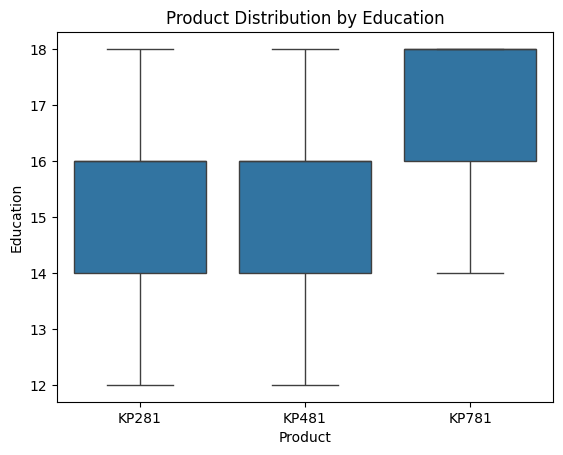

In [39]:
sns.boxplot(data=df, x='Product', y='Education')
plt.title('Product Distribution by Education')
plt.show()

<Axes: xlabel='Product', ylabel='count'>

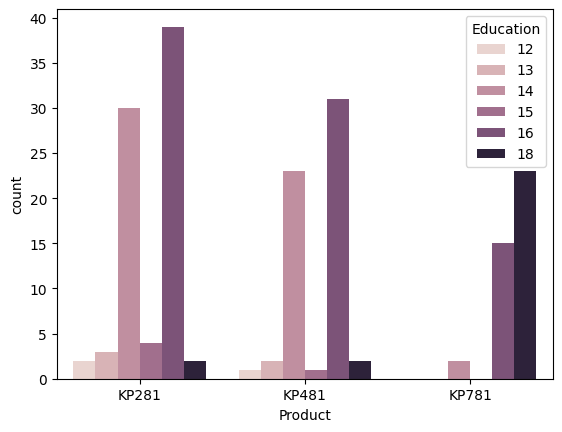

In [40]:
sns.countplot(data=df, x='Product', hue='Education')

Let's check statistically whether there is an association between Product and Education.

First let's check whether the data is normally distributed or not.

In [41]:
education_281 = df[df['Product']=='KP281']['Education']
education_481 = df[df['Product']=='KP481']['Education']
education_781 = df[df['Product']=='KP781']['Education']

Shapiro-Wilkin's test:

H0: Data is normally distributed.

Ha: Data is not normally distributed.

In [42]:
from scipy.stats import shapiro

stats, pvalue = shapiro(education_281)
stats, pvalue

(np.float64(0.8183657067245751), np.float64(1.6159594379732705e-08))

In [43]:
if pvalue < 0.05:
  print('We reject the null hypothesis.')
else:
  print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


From the above test we can conclude the data is not normally distributed therefore we will use kruskal-Wallis test for our hypothesis.

Kruskal-Wallis Test:

H0: There is no association between product and income.

Ha: There is an association between product and income.



In [44]:
from scipy.stats import kruskal

stats, pvalue = kruskal(education_281, education_481, education_781)
stats, pvalue

(np.float64(52.71267600973069), np.float64(3.577567538881721e-12))

In [45]:
if pvalue < 0.05:
  print('We reject the null hypothesis.')
else:
  print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


We can conclude with kruskal-wallis test that there is an association between Education and Product with 99.99% confidence.

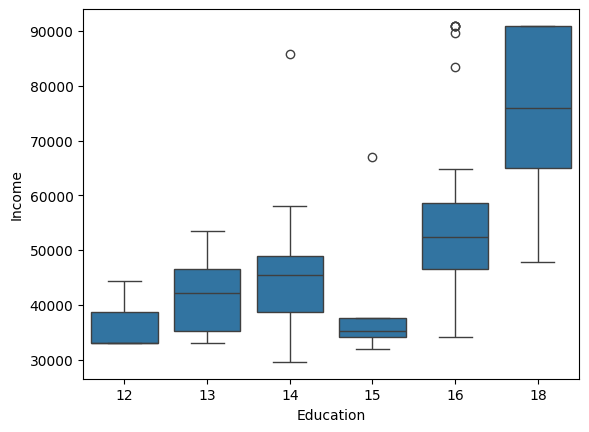

In [46]:
sns.boxplot(data=df, x='Education', y='Income')
plt.show()

It seems to have a correlation between Income and Education. And they both do assosiate with Product as well.

From the above analysis, we have identified which features are associated with the target variable (Product) and which are not. The summary is as follows:


Associate:
 - Gender
 - Income
 - Education


Do not associate:
- MaritalStatus
- Age

# Probability Insights

In [47]:
product_count = pd.crosstab(index=df['Product'], columns='count').reset_index()

In [48]:
product_count['probs'] = np.round(product_count['count'] / product_count['count'].sum(), 2)
product_count

col_0,Product,count,probs
0,KP281,80,0.44
1,KP481,60,0.33
2,KP781,40,0.22


KP281 accounts for 44% of all purchases, making it the most frequently purchased product, followed by KP481 and KP781.

In [49]:
pd.crosstab(df['Gender'], df['Product'], normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


Male customers exhibit no strong product bias, with similar purchase proportions across the three products. Female customers, however, are significantly more concentrated in KP281 purchases ~53% and their engagement with KP781 is notably low ~9%

In [50]:
pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


The distribution of Partnered and Single customers are roughly same.

Now let's convert the numeric columnsto categorical one and check the probabalities of different features.

In [51]:
df_copy = df.copy()
df_copy.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18.0,Male,14,Single,3,4,29562.0,112
1,KP281,19.0,Male,15,Single,2,3,31836.0,75
2,KP281,19.0,Female,14,Partnered,4,3,30699.0,66
3,KP281,19.0,Male,12,Single,3,3,32973.0,85
4,KP281,20.0,Male,13,Partnered,4,2,35247.0,47


In [52]:
df['Age'].min(), df['Age'].max()

(18.0, 43.04999999999998)

Let's make the 2 age categories 17-30 younger, and above that older.

In [53]:
df_copy['Age_bin'] = pd.cut(df_copy['Age'], [17, 30, 45], labels=['younger', 'older'])
df_copy['Age_bin'].value_counts()

,count
Age_bin,
younger,120
older,60


In [54]:
pd.crosstab(df_copy['Age_bin'], df_copy['Product'], normalize='index')

Product,KP281,KP481,KP781
Age_bin,,,
younger,0.458333,0.291667,0.250000
older,0.416667,0.416667,0.166667


There is not much difference, but with age grouped into Younger (17–30) and Older (31+), younger buyers remain evenly distributed across products compared to older buyers who leans more heavily toward KP281 and KP481.

In [55]:
df_copy['Education'].min(), df_copy['Education'].max()

(12, 18)

In [56]:
df_copy['Edu_bin'] = pd.cut(df_copy['Education'], [11, 15, 20], labels=['low', 'high'])
df_copy['Edu_bin'].value_counts()

,count
Edu_bin,
high,112
low,68


In [57]:
pd.crosstab(df_copy['Edu_bin'], df_copy['Product'], normalize='index')

Product,KP281,KP481,KP781
Edu_bin,,,
low,0.573529,0.397059,0.029412
high,0.366071,0.294643,0.339286


Customers with Education < 15 strongly favor KP281 ~57% and rarely choose KP781 ~3%. Those with Education > 15 show a more even split, with about 34% purchasing KP781.

In [58]:
df_copy['Income'].min(), df_copy['Income'].max()

(29562.0, 90948.24999999999)

In [59]:
df_copy['Income_bin'] = pd.cut(df_copy['Income'], [0, 50000, 100000], labels=['low', 'high'])
df_copy['Income_bin'].value_counts()

,count
Income_bin,
high,97
low,83


In [60]:
pd.crosstab(df_copy['Income_bin'], df_copy['Product'], normalize='index')

Product,KP281,KP481,KP781
Income_bin,,,
low,0.578313,0.361446,0.060241
high,0.329897,0.309278,0.360825


As KP781 is a premium product, only ~6% of customers earning <50k purchase it, compared to ~36% in the >50k income group.

In [61]:
df_copy['Usage'].min(), df_copy['Usage'].max()

(2, 7)

In [62]:
df_copy['Usage_bin'] = pd.cut(df_copy['Usage'], [1, 3, 5, 7], labels=['low', 'medium', 'high'])
df_copy['Usage_bin'].value_counts()

,count
Usage_bin,
low,102
medium,69
high,9


In [63]:
pd.crosstab(df_copy['Usage_bin'], df_copy['Product'], normalize='index')

Product,KP281,KP481,KP781
Usage_bin,,,
low,0.549020,0.441176,0.009804
medium,0.347826,0.217391,0.434783
high,0.000000,0.000000,1.000000


There is an interesting behavioral pattern in Usage.
Only 9 customers fall into the high-usage group (6–7 times per week), and all of them purchased the KP781 premium model. Although the sample size is small, this suggests that customers who plan to use the treadmill intensively tend to choose the highest-end product.

On the other hand, among customers who plan to use the treadmill only 2–3 times per week, only about 1% purchased KP781, indicating that light users overwhelmingly prefer lower-priced models.

In [64]:
df_copy['Fitness'].min(), df_copy['Fitness'].max()

(1, 5)

In [65]:
df_copy['Fitness_bin'] = pd.cut(df_copy['Fitness'], [0, 2, 3, 5], labels=['low', 'medium', 'high'])
df_copy['Fitness_bin'].value_counts()

,count
Fitness_bin,
medium,97
high,55
low,28


In [66]:
pd.crosstab(df_copy['Fitness_bin'], df_copy['Product'], normalize='index')

Product,KP281,KP481,KP781
Fitness_bin,,,
low,0.535714,0.464286,0.000000
medium,0.556701,0.402062,0.041237
high,0.200000,0.145455,0.654545


People who rate their fitness level as high (4–5) show a strong preference for the KP781 premium product, with about 65% of them choosing it. In contrast, individuals with medium fitness (3) or low fitness levels (1–2) tend to prefer the KP281 product.

In [67]:
df_copy['Miles'].min(), df_copy['Miles'].max()

(21, 200)

In [68]:
df_copy['Miles_bin'] = pd.cut(df_copy['Miles'], [0, 80, 120, 200], labels=['low', 'medium', 'high'])
df_copy['Miles_bin'].value_counts()

,count
Miles_bin,
medium,78
low,60
high,42


In [69]:
pd.crosstab(df_copy['Miles_bin'], df_copy['Product'], normalize='index')

Product,KP281,KP481,KP781
Miles_bin,,,
low,0.633333,0.350000,0.016667
medium,0.461538,0.397436,0.141026
high,0.142857,0.190476,0.666667


Low-mile customers strongly prefer KP281 (63%), with almost no interest in KP781.

Medium-mile customers are more evenly split, though KP781 begins to gain appeal.

High-mile customers overwhelmingly choose KP781 (67%), with very low preference for KP281 or KP481.

# Correlation among features


In [70]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18.0,Male,14,Single,3,4,29562.0,112
1,KP281,19.0,Male,15,Single,2,3,31836.0,75
2,KP281,19.0,Female,14,Partnered,4,3,30699.0,66
3,KP281,19.0,Male,12,Single,3,3,32973.0,85
4,KP281,20.0,Male,13,Partnered,4,2,35247.0,47


In order to find the correlation with every feature, let's convert categorical columns to numerical columns using encoding.

In [71]:
df_corr = df.copy()
df_corr.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18.0,Male,14,Single,3,4,29562.0,112
1,KP281,19.0,Male,15,Single,2,3,31836.0,75
2,KP281,19.0,Female,14,Partnered,4,3,30699.0,66
3,KP281,19.0,Male,12,Single,3,3,32973.0,85
4,KP281,20.0,Male,13,Partnered,4,2,35247.0,47


In [72]:
df_corr['Gender'] = df_corr['Gender'].map({'Male':1, 'Female':0})
df_corr.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18.0,1,14,Single,3,4,29562.0,112
1,KP281,19.0,1,15,Single,2,3,31836.0,75
2,KP281,19.0,0,14,Partnered,4,3,30699.0,66
3,KP281,19.0,1,12,Single,3,3,32973.0,85
4,KP281,20.0,1,13,Partnered,4,2,35247.0,47


In [73]:
df_corr['MaritalStatus'] = df_corr['MaritalStatus'].map({'Single':0, 'Partnered':1})
df_corr.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18.0,1,14,0,3,4,29562.0,112
1,KP281,19.0,1,15,0,2,3,31836.0,75
2,KP281,19.0,0,14,1,4,3,30699.0,66
3,KP281,19.0,1,12,0,3,3,32973.0,85
4,KP281,20.0,1,13,1,4,2,35247.0,47


In [74]:
df_corr['Product'] = df_corr['Product'].map({'KP281':1, 'KP481':2, 'KP781':3})
df_corr.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,1,18.0,1,14,0,3,4,29562.0,112
1,1,19.0,1,15,0,2,3,31836.0,75
2,1,19.0,0,14,1,4,3,30699.0,66
3,1,19.0,1,12,0,3,3,32973.0,85
4,1,20.0,1,13,1,4,2,35247.0,47


In [75]:
df_corr.corr(method='pearson')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.030868,0.230653,0.482075,-0.017602,0.537447,0.594883,0.626559,0.587551
Age,0.030868,1.000000,0.024423,0.304457,0.187440,0.020054,0.058490,0.521927,0.029813
Gender,0.230653,0.024423,1.000000,0.091336,-0.018836,0.214424,0.254609,0.199543,0.231820
Education,0.482075,0.304457,0.091336,1.000000,0.087741,0.394640,0.415753,0.624908,0.359141
MaritalStatus,-0.017602,0.187440,-0.018836,0.087741,1.000000,-0.007786,-0.050751,0.141839,-0.017076
Usage,0.537447,0.020054,0.214424,0.394640,-0.007786,1.000000,0.668606,0.526249,0.788546
Fitness,0.594883,0.058490,0.254609,0.415753,-0.050751,0.668606,1.000000,0.532199,0.827889
Income,0.626559,0.521927,0.199543,0.624908,0.141839,0.526249,0.532199,1.000000,0.529336
Miles,0.587551,0.029813,0.231820,0.359141,-0.017076,0.788546,0.827889,0.529336,1.000000


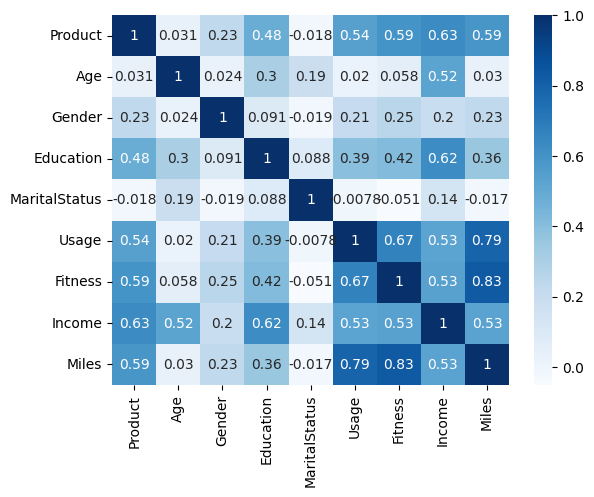

In [76]:
sns.heatmap(df_corr.corr(method='pearson'), annot=True, cmap='Blues')
plt.show()

In [77]:
df_corr.corr(method='spearman')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.045015,0.216556,0.435294,-0.016397,0.469001,0.515324,0.507527,0.513688
Age,0.045015,1.000000,-0.002713,0.332846,0.203691,0.031388,0.063239,0.682590,0.024512
Gender,0.216556,-0.002713,1.000000,0.102310,-0.018836,0.227516,0.254607,0.173508,0.256298
Education,0.435294,0.332846,0.102310,1.000000,0.093891,0.380170,0.390731,0.615080,0.302608
MaritalStatus,-0.016397,0.203691,-0.018836,0.093891,1.000000,-0.036929,-0.061196,0.157977,-0.085467
Usage,0.469001,0.031388,0.227516,0.380170,-0.036929,1.000000,0.643817,0.372975,0.758286
Fitness,0.515324,0.063239,0.254607,0.390731,-0.061196,0.643817,1.000000,0.396658,0.815987
Income,0.507527,0.682590,0.173508,0.615080,0.157977,0.372975,0.396658,1.000000,0.356188
Miles,0.513688,0.024512,0.256298,0.302608,-0.085467,0.758286,0.815987,0.356188,1.000000


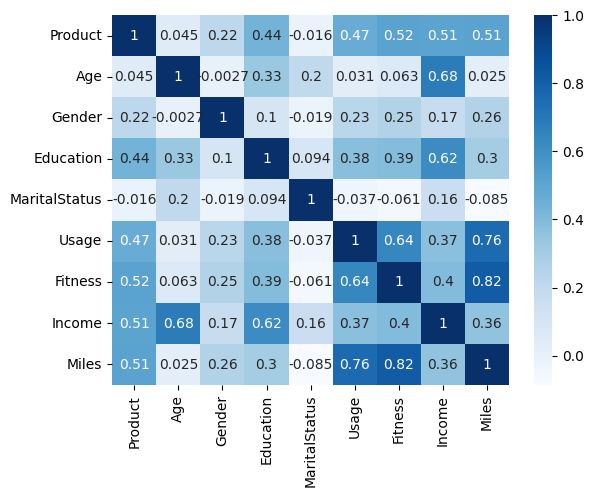

In [78]:
sns.heatmap(df_corr.corr(method='spearman'), annot=True, cmap='Blues')
plt.show()

We have check the both spearman and pearson's correlation and found that Product has the high positive correlation with following features:

- Income
- Miles
- Fitness
- Usage
- Education
- Gender

And approximately zero correlation with:
- Age
- MaritalStatus

It is also interesting to note that Income and Education have a high correlation.

Income and Age show a higher correlation under the Spearman method than under Pearson, which suggests that their relationship is likely monotonic but nonlinear.

# Customer Profiling

In [79]:
df_cust = df.copy()
df_cust.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18.0,Male,14,Single,3,4,29562.0,112
1,KP281,19.0,Male,15,Single,2,3,31836.0,75
2,KP281,19.0,Female,14,Partnered,4,3,30699.0,66
3,KP281,19.0,Male,12,Single,3,3,32973.0,85
4,KP281,20.0,Male,13,Partnered,4,2,35247.0,47


In [80]:
df_cust['Age_bin'] = pd.qcut(df_cust['Age'], q=3, labels=['young', 'medium', 'old'])
df_cust['Edu_bin'] = pd.cut(df_cust['Education'], [11, 15, 20], labels=['low', 'high'])
df_cust['Income_bin'] = pd.qcut(df_cust['Income'], q=4, labels=['low', 'medium', 'high', 'very-high'])
df_cust['Miles_bin'] = pd.qcut(df_cust['Miles'], q=3, labels=['low', 'medium', 'high'])
df_cust['Usage_bin'] = pd.cut(df_cust['Usage'], [1, 3, 5, 7], labels=['low', 'medium', 'high'])
df_cust['Fitness_bin'] = pd.cut(df_cust['Fitness'], [0, 2, 3, 5], labels=['low', 'medium', 'high'])

In [81]:
df_cust.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bin,Edu_bin,Income_bin,Miles_bin,Usage_bin,Fitness_bin
0,KP281,18.0,Male,14,Single,3,4,29562.0,112,young,low,low,high,low,high
1,KP281,19.0,Male,15,Single,2,3,31836.0,75,young,low,low,low,low,medium
2,KP281,19.0,Female,14,Partnered,4,3,30699.0,66,young,low,low,low,medium,medium
3,KP281,19.0,Male,12,Single,3,3,32973.0,85,young,low,low,medium,low,medium
4,KP281,20.0,Male,13,Partnered,4,2,35247.0,47,young,low,low,low,medium,low


In [82]:
df_281 = df_cust[df_cust['Product'] == 'KP281']
df_481 = df_cust[df_cust['Product'] == 'KP481']
df_781 = df_cust[df_cust['Product'] == 'KP781']

In [83]:
print('P(Gender) \n', df_cust['Gender'].value_counts(normalize=True), '\n')
print('P(Gender | KP281) \n', df_281['Gender'].value_counts(normalize=True), '\n')
print('P(Gender | KP481) \n', df_481['Gender'].value_counts(normalize=True), '\n')
print('P(Gender | KP781) \n', df_781['Gender'].value_counts(normalize=True), '\n')

P(Gender) 
 Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64 

P(Gender | KP281) 
 Gender
Male      0.5
Female    0.5
Name: proportion, dtype: float64 

P(Gender | KP481) 
 Gender
Male      0.516667
Female    0.483333
Name: proportion, dtype: float64 

P(Gender | KP781) 
 Gender
Male      0.825
Female    0.175
Name: proportion, dtype: float64 



In [84]:
print('P(MaritalStatus) \n', df_cust['MaritalStatus'].value_counts(normalize=True), '\n')
print('P(MaritalStatus | KP281) \n', df_281['MaritalStatus'].value_counts(normalize=True), '\n')
print('P(MaritalStatus | KP481) \n', df_481['MaritalStatus'].value_counts(normalize=True), '\n')
print('P(MaritalStatus | KP781) \n', df_781['MaritalStatus'].value_counts(normalize=True), '\n')

P(MaritalStatus) 
 MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64 

P(MaritalStatus | KP281) 
 MaritalStatus
Partnered    0.6
Single       0.4
Name: proportion, dtype: float64 

P(MaritalStatus | KP481) 
 MaritalStatus
Partnered    0.6
Single       0.4
Name: proportion, dtype: float64 

P(MaritalStatus | KP781) 
 MaritalStatus
Partnered    0.575
Single       0.425
Name: proportion, dtype: float64 



In [85]:
for bin in df_cust['Age_bin'].unique():
  print(f'Range of {bin}: ', np.round(df_cust[df_cust['Age_bin']==bin]['Age'].min(), 2), 'to', np.round(df_cust[df_cust['Age_bin']==bin]['Age'].max(), 2))

print('\n')
print('P(Age_bin) \n', df_cust['Age_bin'].value_counts(normalize=True))
print('Median Age :', np.round(df_cust['Age'].median(), 2), ', Mean age : ', np.round(df_cust['Age'].mean(), 2), '\n\n')
print('P(Age_bin | KP281) \n', df_281['Age_bin'].value_counts(normalize=True))
print('Median Age for KP281 :', np.round(df_281['Age'].median(), 2), 'Mean Age for KP281 :', np.round(df_281['Age'].mean(), 2), '\n\n')
print('P(Age_bin | KP481) \n', df_481['Age_bin'].value_counts(normalize=True))
print('Median Age for KP481 :', np.round(df_481['Age'].median(), 2), 'Mean Age for KP481 :', np.round(df_481['Age'].mean(), 2), '\n\n')
print('P(Age_bin | KP781) \n', df_781['Age_bin'].value_counts(normalize=True))
print('Median Age for KP781 :', np.round(df_781['Age'].median(), 2), 'Mean Age for KP781 :', np.round(df_781['Age'].mean(), 2), '\n\n')

Range of young:  18.0 to 25.0
Range of medium:  26.0 to 30.0
Range of old:  31.0 to 43.05


P(Age_bin) 
 Age_bin
young     0.438889
old       0.333333
medium    0.227778
Name: proportion, dtype: float64
Median Age : 26.0 , Mean age :  28.61 


P(Age_bin | KP281) 
 Age_bin
young     0.4250
old       0.3125
medium    0.2625
Name: proportion, dtype: float64
Median Age for KP281 : 26.0 Mean Age for KP281 : 28.36 


P(Age_bin | KP481) 
 Age_bin
young     0.466667
old       0.416667
medium    0.116667
Name: proportion, dtype: float64
Median Age for KP481 : 26.0 Mean Age for KP481 : 28.78 


P(Age_bin | KP781) 
 Age_bin
young     0.425
medium    0.325
old       0.250
Name: proportion, dtype: float64
Median Age for KP781 : 27.0 Mean Age for KP781 : 28.83 




In [86]:
for bin in df_cust['Edu_bin'].unique():
  print(f'Range of {bin}: ', np.round(df_cust[df_cust['Edu_bin']==bin]['Education'].min(), 2), 'to', np.round(df_cust[df_cust['Edu_bin']==bin]['Education'].max(), 2))

print('\n')
print('P(Edu_bin) \n', df_cust['Edu_bin'].value_counts(normalize=True))
print('Median Education :', np.round(df_cust['Education'].median(), 2), ', Mean Education : ', np.round(df_cust['Education'].mean(), 2), '\n\n')
print('P(Edu_bin | KP281) \n', df_281['Edu_bin'].value_counts(normalize=True))
print('Median Education for KP281 :', np.round(df_281['Education'].median(), 2), 'Mean Education for KP281 :', np.round(df_281['Education'].mean(), 2), '\n\n')
print('P(Edu_bin | KP481) \n', df_481['Edu_bin'].value_counts(normalize=True))
print('Median Education for KP481 :', np.round(df_481['Education'].median(), 2), 'Mean Education for KP481 :', np.round(df_481['Education'].mean(), 2), '\n\n')
print('P(Edu_bin | KP781) \n', df_781['Edu_bin'].value_counts(normalize=True))
print('Median Education for KP781 :', np.round(df_781['Education'].median(), 2), 'Mean Education for KP781 :', np.round(df_781['Education'].mean(), 2), '\n\n')

Range of low:  12 to 15
Range of high:  16 to 18


P(Edu_bin) 
 Edu_bin
high    0.622222
low     0.377778
Name: proportion, dtype: float64
Median Education : 16.0 , Mean Education :  15.51 


P(Edu_bin | KP281) 
 Edu_bin
high    0.5125
low     0.4875
Name: proportion, dtype: float64
Median Education for KP281 : 16.0 Mean Education for KP281 : 15.04 


P(Edu_bin | KP481) 
 Edu_bin
high    0.55
low     0.45
Name: proportion, dtype: float64
Median Education for KP481 : 16.0 Mean Education for KP481 : 15.12 


P(Edu_bin | KP781) 
 Edu_bin
high    0.95
low     0.05
Name: proportion, dtype: float64
Median Education for KP781 : 18.0 Mean Education for KP781 : 17.05 




In [87]:
for bin in df_cust['Income_bin'].unique():
  print(f'Range of {bin}: ', np.round(df_cust[df_cust['Income_bin']==bin]['Income'].min(), 2), 'to', np.round(df_cust[df_cust['Income_bin']==bin]['Income'].max(), 2))

print('\n')
print('P(Income_bin) \n', df_cust['Income_bin'].value_counts(normalize=True))
print('Median Income :', np.round(df_cust['Income'].median(), 2), ', Mean Income : ', np.round(df_cust['Income'].mean(), 2), '\n\n')
print('P(Income_bin | KP281) \n', df_281['Income_bin'].value_counts(normalize=True))
print('Median Income for KP281 :', np.round(df_281['Income'].median(), 2), 'Mean Income for KP281 :', np.round(df_281['Income'].mean(), 2), '\n\n')
print('P(Income_bin | KP481) \n', df_481['Income_bin'].value_counts(normalize=True))
print('Median Income for KP481 :', np.round(df_481['Income'].median(), 2), 'Mean Income for KP481 :', np.round(df_481['Income'].mean(), 2), '\n\n')
print('P(Income_bin | KP781) \n', df_781['Income_bin'].value_counts(normalize=True))
print('Median Income for KP781 :', np.round(df_781['Income'].median(), 2), 'Mean Income for KP781 :', np.round(df_781['Income'].mean(), 2), '\n\n')

Range of low:  29562.0 to 43206.0
Range of medium:  44343.0 to 50028.0
Range of high:  51165.0 to 58516.0
Range of very-high:  59124.0 to 90948.25


P(Income_bin) 
 Income_bin
low          0.25
medium       0.25
high         0.25
very-high    0.25
Name: proportion, dtype: float64
Median Income : 50596.5 , Mean Income :  53378.85 


P(Income_bin | KP281) 
 Income_bin
low          0.3750
high         0.2875
medium       0.2500
very-high    0.0875
Name: proportion, dtype: float64
Median Income for KP281 : 46617.0 Mean Income for KP281 : 46418.02 


P(Income_bin | KP481) 
 Income_bin
medium       0.333333
high         0.266667
low          0.250000
very-high    0.150000
Name: proportion, dtype: float64
Median Income for KP481 : 49459.5 Mean Income for KP481 : 48973.65 


P(Income_bin | KP781) 
 Income_bin
very-high    0.725
high         0.150
medium       0.125
low          0.000
Name: proportion, dtype: float64
Median Income for KP781 : 76568.5 Mean Income for KP781 : 73908.28 




In [88]:
for bin in df_cust['Usage_bin'].unique():
  print(f'Range of {bin}: ', np.round(df_cust[df_cust['Usage_bin']==bin]['Usage'].min(), 2), 'to', np.round(df_cust[df_cust['Usage_bin']==bin]['Usage'].max(), 2))

print('\n')
print('P(Usage_bin) \n', df_cust['Usage_bin'].value_counts(normalize=True))
print('Median Usage :', np.round(df_cust['Usage'].median(), 2), ', Mean Usage : ', np.round(df_cust['Usage'].mean(), 2), '\n\n')
print('P(Usage_bin | KP281) \n', df_281['Usage_bin'].value_counts(normalize=True))
print('Median Usage for KP281 :', np.round(df_281['Usage'].median(), 2), 'Mean Usage for KP281 :', np.round(df_281['Usage'].mean(), 2), '\n\n')
print('P(Usage_bin | KP481) \n', df_481['Usage_bin'].value_counts(normalize=True))
print('Median Usage for KP481 :', np.round(df_481['Usage'].median(), 2), 'Mean Usage for KP481 :', np.round(df_481['Usage'].mean(), 2), '\n\n')
print('P(Usage_bin | KP781) \n', df_781['Usage_bin'].value_counts(normalize=True))
print('Median Usage for KP781 :', np.round(df_781['Usage'].median(), 2), 'Mean Usage for KP781 :', np.round(df_781['Usage'].mean(), 2), '\n\n')

Range of low:  2 to 3
Range of medium:  4 to 5
Range of high:  6 to 7


P(Usage_bin) 
 Usage_bin
low       0.566667
medium    0.383333
high      0.050000
Name: proportion, dtype: float64
Median Usage : 3.0 , Mean Usage :  3.46 


P(Usage_bin | KP281) 
 Usage_bin
low       0.7
medium    0.3
high      0.0
Name: proportion, dtype: float64
Median Usage for KP281 : 3.0 Mean Usage for KP281 : 3.09 


P(Usage_bin | KP481) 
 Usage_bin
low       0.75
medium    0.25
high      0.00
Name: proportion, dtype: float64
Median Usage for KP481 : 3.0 Mean Usage for KP481 : 3.07 


P(Usage_bin | KP781) 
 Usage_bin
medium    0.750
high      0.225
low       0.025
Name: proportion, dtype: float64
Median Usage for KP781 : 5.0 Mean Usage for KP781 : 4.78 




In [89]:
for bin in df_cust['Fitness_bin'].unique():
  print(f'Range of {bin}: ', np.round(df_cust[df_cust['Fitness_bin']==bin]['Fitness'].min(), 2), 'to', np.round(df_cust[df_cust['Fitness_bin']==bin]['Fitness'].max(), 2))

print('\n')
print('P(Fitness_bin) \n', df_cust['Fitness_bin'].value_counts(normalize=True))
print('Median Fitness :', np.round(df_cust['Fitness'].median(), 2), ', Mean Fitness : ', np.round(df_cust['Fitness'].mean(), 2), '\n\n')
print('P(Fitness_bin | KP281) \n', df_281['Fitness_bin'].value_counts(normalize=True))
print('Median Fitness for KP281 :', np.round(df_281['Fitness'].median(), 2), 'Mean Fitness for KP281 :', np.round(df_281['Fitness'].mean(), 2), '\n\n')
print('P(Fitness_bin | KP481) \n', df_481['Fitness_bin'].value_counts(normalize=True))
print('Median Fitness for KP481 :', np.round(df_481['Fitness'].median(), 2), 'Mean Fitness for KP481 :', np.round(df_481['Fitness'].mean(), 2), '\n\n')
print('P(Fitness_bin | KP781) \n', df_781['Fitness_bin'].value_counts(normalize=True))
print('Median Fitness for KP781 :', np.round(df_781['Fitness'].median(), 2), 'Mean Fitness for KP781 :', np.round(df_781['Fitness'].mean(), 2), '\n\n')

Range of high:  4 to 5
Range of medium:  3 to 3
Range of low:  1 to 2


P(Fitness_bin) 
 Fitness_bin
medium    0.538889
high      0.305556
low       0.155556
Name: proportion, dtype: float64
Median Fitness : 3.0 , Mean Fitness :  3.31 


P(Fitness_bin | KP281) 
 Fitness_bin
medium    0.6750
low       0.1875
high      0.1375
Name: proportion, dtype: float64
Median Fitness for KP281 : 3.0 Mean Fitness for KP281 : 2.96 


P(Fitness_bin | KP481) 
 Fitness_bin
medium    0.650000
low       0.216667
high      0.133333
Name: proportion, dtype: float64
Median Fitness for KP481 : 3.0 Mean Fitness for KP481 : 2.9 


P(Fitness_bin | KP781) 
 Fitness_bin
high      0.9
medium    0.1
low       0.0
Name: proportion, dtype: float64
Median Fitness for KP781 : 5.0 Mean Fitness for KP781 : 4.62 




In [90]:
for bin in df_cust['Miles_bin'].unique():
  print(f'Range of {bin}: ', np.round(df_cust[df_cust['Miles_bin']==bin]['Miles'].min(), 2), 'to', np.round(df_cust[df_cust['Miles_bin']==bin]['Miles'].max(), 2))

print('\n')
print('P(Miles_bin) \n', df_cust['Miles_bin'].value_counts(normalize=True))
print('Median Miles :', np.round(df_cust['Miles'].median(), 2), ', Mean Miles : ', np.round(df_cust['Miles'].mean(), 2), '\n\n')
print('P(Miles_bin | KP281) \n', df_281['Miles_bin'].value_counts(normalize=True))
print('Median Miles for KP281 :', np.round(df_281['Miles'].median(), 2), 'Mean Miles for KP281 :', np.round(df_281['Miles'].mean(), 2), '\n\n')
print('P(Miles_bin | KP481) \n', df_481['Miles_bin'].value_counts(normalize=True))
print('Median Miles for KP481 :', np.round(df_481['Miles'].median(), 2), 'Mean Miles for KP481 :', np.round(df_481['Miles'].mean(), 2), '\n\n')
print('P(Miles_bin | KP781) \n', df_781['Miles_bin'].value_counts(normalize=True))
print('Median Miles for KP781 :', np.round(df_781['Miles'].median(), 2), 'Mean Miles for KP781 :', np.round(df_781['Miles'].mean(), 2), '\n\n')

Range of high:  112 to 200
Range of low:  21 to 80
Range of medium:  85 to 106


P(Miles_bin) 
 Miles_bin
medium    0.366667
low       0.333333
high      0.300000
Name: proportion, dtype: float64
Median Miles : 94.0 , Mean Miles :  100.68 


P(Miles_bin | KP281) 
 Miles_bin
low       0.4750
medium    0.3375
high      0.1875
Name: proportion, dtype: float64
Median Miles for KP281 : 85.0 Mean Miles for KP281 : 82.79 


P(Miles_bin | KP481) 
 Miles_bin
medium    0.516667
low       0.350000
high      0.133333
Name: proportion, dtype: float64
Median Miles for KP481 : 85.0 Mean Miles for KP481 : 87.73 


P(Miles_bin | KP781) 
 Miles_bin
high      0.775
medium    0.200
low       0.025
Name: proportion, dtype: float64
Median Miles for KP781 : 160.0 Mean Miles for KP781 : 155.9 




## **General Profiling :**
- **Gender:** Mixed, approximately 58% male.
- **MaritalSattus:** 60% partnered.
- **Age:** Median age 26, 44% customers are between 18-24.
- **Education:** Median of 16.
- **Usage:** Medium, 94.7% use the service <=5 days per week
- **Fitness:** 3 rating out of 5 (54%), 85% customers have >=3.
- **Income:** Median of 50596
- **Miles:** Median of 94 miles.

## **KP281 Profiling :**
- **Gender:** Mixed, 50% male and 50% Female.
- **MaritalSattus:** 60% partnered.
- **Age:** Median age 26, 42.5% customers are between 18-24.
- **Education:** Median of 16.
- **Usage:** Low, 70% use the service <=3 days per week
- **Fitness:** Medium, 3 rating out of 5 (67.5%)
- **Income:** Median of 46617, 37.5% customers have income <43k.
- **Miles:** Median of 85 miles, 80% users run <110 miles.

## **KP481 Profiling :**
- **Gender:** Mixed, 52% male.
- **MaritalSattus:** 60% partnered.
- **Age:** Median age 26, 46.7% customers are between 18-24.
- **Education:** Median of 16, 55% users have >=16 years of education.
- **Usage:** Low, 75% use the service <=3 days per week.
- **Fitness:** Medium, 3 rating out of 5 (65%)
- **Income:** Median of 49460, ~33% have Income between 44k and 50k.
- **Miles:** Median of 85 miles.

## **KP781 Profiling :**
- **Gender:** Male, 82.5% male.
- **MaritalSattus:** 57.5% partnered.
- **Age:** Median age 27, 46.7% customers are between 18-24, and 32.5% are between 26 and 30.
- **Education:** Median of 18, 95% users have >=16 years of education.
- **Usage:** Medium to high, 97.5% use the service >=4 days per week.
- **Fitness:** High, 90% of users rate >3 rating out of 5.
- **Income:** Median of 76568, ~72.5% have Income above 59k.
- **Miles:** Median of 160 miles.

**Summary:**
- KP281 and KP481 have very similar customer profile.
- KP781 premium product have some high specific like Income, usage, miles, fitness, gender. Male who are rich and more into fitness prefer KP781.
- From the statistical tests, we found that significant predictors of product include Gender, Income, Education, usage, fitness and miles, in contrast age and marital status are not statistically signiicant.